# Can We Predict The Star Type

With ML techniques, we can categorize the stars between main sequence stars and giants.

* Tasks you can do:
1. Preprocess the Data
    - Clean the Data (Null values, Errored values)
    - Create Amag column via the equation
    - Create a label column via SpType
    
    
2. Analysis and Predict Star Type
    - Try with Logistic Regression and create a decision boundary
    - Performing deep neural network and create a decision boundary

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  
    target_cell = this_cell  
    js_hide_current = ''

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# 1. Process the Data 

#### Imporing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from IPython.display import Image, display
from PIL import Image

In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot

In [4]:
os.getcwd()

'C:\\Users\\bruna\\IronHack\\GitHub\\Project\\Project 6\\Star-Classification'

#### Loading dataset

In [5]:
raw = pd.read_csv('../Star-Classification/Star99999_raw.csv')

In [6]:
import os
os.chdir(r'C:\Users\bruna\IronHack\GitHub\Project\Project 6\Star-Classification')

#### Exploring dataset

In [7]:
raw.head()

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


#### Columns:

Vmag - Visual Apparent Magnitude of the Star (m)

Plx - Distance Between the Star and the Earth (d)

e_Plx - Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

B-V - B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)

SpType - Stellar classification.

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


# - Data Cleaning

#### Unnamed: 0 is a index columns :

but we already have it so let's dropt it


In [9]:
raw.drop('Unnamed: 0', axis = 1, inplace = True)

raw.head()

,Vmag,Plx,e_Plx,B-V,SpType
0,9.10,3.54,1.39,0.482,F5
1,9.27,21.90,3.10,0.999,K3V
2,6.61,2.81,0.63,-0.019,B9
3,8.06,7.75,0.97,0.370,F0V
4,8.55,2.87,1.11,0.902,G8III


#### Let's change the columns name to better manipulation

In [10]:
raw.rename(columns={'B-V':'B_V'}, inplace = True)

In [11]:
raw.query('B_V == "      "')

,Vmag,Plx,e_Plx,B_V,SpType
44,9.59,15.10,1.92,,G6/G8V:
52,10.96,-1.76,2.45,,NaN
319,12.14,6.48,4.13,,F1:
374,9.08,6.13,1.59,,NaN
389,11.67,4.86,2.61,,F7
...,...,...,...,...,...
99525,8.71,,,,NaN
99665,9.25,5.97,3.05,,NaN
99701,10.46,23.91,1.78,,K0
99770,9.53,,,,NaN


#### converting object type columns to numeric

In [12]:
raw.Vmag = pd.to_numeric(raw.Vmag, downcast='float', errors ='coerce')
raw.Plx = pd.to_numeric(raw.Plx, downcast='float', errors ='coerce')
raw.e_Plx = pd.to_numeric(raw.e_Plx, downcast='float', errors ='coerce')
raw['B_V'] = pd.to_numeric(raw['B_V'], downcast='float', errors ='coerce')

In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    99998 non-null  float32
 1   Plx     99768 non-null  float32
 2   e_Plx   99768 non-null  float32
 3   B_V     98871 non-null  float32
 4   SpType  97377 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.3+ MB


In [14]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,99998.0,8.369750,1.313896,-1.440000,7.640,8.440,9.140,14.080000
Plx,99768.0,7.212467,11.348988,-54.950001,2.510,4.630,8.410,772.330017
e_Plx,99768.0,1.365385,1.816838,0.380000,0.880,1.100,1.390,114.459999
B_V,98871.0,0.704726,0.489679,-0.400000,0.348,0.612,1.075,5.460000


#### Checking for missing values

In [15]:
raw.isnull().sum()

Vmag         1
Plx        231
e_Plx      231
B_V       1128
SpType    2622
dtype: int64

In [16]:
raw.shape

(99999, 5)

#### What is the % of the missing data

In [18]:
total_cells = np.product(raw.shape)
total_missing = raw.isnull().sum().sum()
percent_missing = (total_missing/total_cells)* 100

In [19]:
print(f'Missing data equals: {round(percent_missing,2)}%' )

Missing data equals: 0.84%


#### Pourcentage insignificant, so lets drop those rows

In [20]:
raw_missing_removed = raw.dropna()

In [21]:
raw_missing_removed.shape

(96742, 5)

In [22]:
raw_missing_removed.isnull().sum()

Vmag      0
Plx       0
e_Plx     0
B_V       0
SpType    0
dtype: int64

#### How many rows did we dropped?

In [23]:
dropped_rows = raw.shape[0] - raw_missing_removed.shape[0]

In [24]:
print(f'We dropped : {dropped_rows} rows')

We dropped : 3257 rows


#### What is the pourcentage of this amount? 

In [25]:
pourcentage_dropped_rows = ((raw.shape[0] - raw_missing_removed.shape[0])/raw.shape[0])*100

In [26]:
print(f'Dropped rows equals : {round(pourcentage_dropped_rows,2)} %')

Dropped rows equals : 3.26 %


#### Checking for duplicated

In [27]:
raw_missing_removed.duplicated().sum()

0

#### But after dropping so many rows our index must be weird

#### Let's ReIndex it

In [28]:
raw_missing_removed.reset_index(drop=True, inplace = True)

In [29]:
raw_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96742 entries, 0 to 96741
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    96742 non-null  float32
 1   Plx     96742 non-null  float32
 2   e_Plx   96742 non-null  float32
 3   B_V     96742 non-null  float32
 4   SpType  96742 non-null  object 
dtypes: float32(4), object(1)
memory usage: 2.2+ MB


<AxesSubplot:>

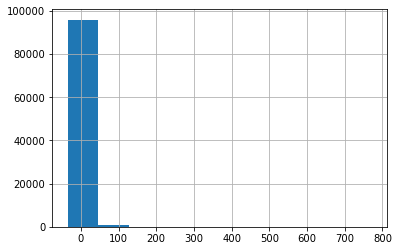

In [30]:
raw_missing_removed.Plx.hist(bins = 10)

In [31]:
raw_missing_removed.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96742.0,8.291918,1.247995,-1.440000,7.610,8.400,9.070,13.610000
Plx,96742.0,7.105242,11.145643,-35.099998,2.520,4.600,8.270,772.330017
e_Plx,96742.0,1.264163,1.156202,0.380000,0.870,1.080,1.360,69.070000
B_V,96742.0,0.700663,0.490053,-0.400000,0.342,0.605,1.072,5.460000


#### Are there any outliers?


In [32]:
#summary = raw_missing_removed.describe().T

In [33]:
#summary['IQR']=summary['75%']-summary['25%']
#summary.head()

In [34]:
#summary['IQR']=summary['75%']-summary['25%']
#summary.head()

In [35]:
# The outliners

#summary['cutoff']=round(summary.IQR*1.6, 3)
#summary.head()

In [36]:
#summary['lw']=round(summary['25%']-summary.cutoff, 3)
#summary['rw']=round(summary['75%']+summary.cutoff, 3)
#summary.head()

In [37]:
#sns.boxplot(raw_missing_removed.Plx)

In [38]:
#sns.boxplot(raw_missing_removed.Vmag)

In [39]:
# create a df with outliers
#outliers=pd.DataFrame(columns=raw_missing_removed.columns)

#loop to detect outliers in each column
#for col in summary.index:
 #   lower=summary.at[col,'lw'] #get lower whisker for this column
  #  upper=summary.at[col,'rw'] #get upper whisker for this column
   # results=raw_missing_removed[(raw_missing_removed[col]<lower)|
     #            (raw_missing_removed[col]>upper)].copy() #get the dataframe
    #results['Outlier']=col #to be able to identify in which column we obtained outliers
    #outliers=outliers.append(results) #save them

In [40]:
#outliers

In [41]:
#raw_cleaned =raw_missing_removed.drop(outliers.index)
#print('Shape after dropping changed:', raw_cleaned.shape)


In [42]:
#raw_cleaned.describe().T

In [43]:
#raw_cleaned.B_V.hist()

# Data Cleaned 

### Let's Find the Absolute Magnitude (Amag)
### And other features of the Stars

#### Equation asks for log of Plx(d) (which is the distance between the star and the Earth)
#### But log of 0 is infinite and we can't use it

So let's not consider theses rows

In [44]:
raw_cleaned =raw_missing_removed

In [45]:
raw_cleaned.query("Plx == 0")

,Vmag,Plx,e_Plx,B_V,SpType
945,8.68,0.0,1.19,1.290,K2III
1413,7.63,0.0,0.77,0.267,B1II...
18219,10.09,0.0,1.84,0.190,A0
23867,10.75,0.0,1.21,-0.012,B
26477,9.01,0.0,1.40,0.089,B8
29457,8.44,0.0,1.26,0.042,B1Vne
29968,6.57,0.0,0.89,0.121,A0III
36969,7.90,0.0,0.99,1.745,S
37320,8.24,0.0,1.29,1.341,K0
39917,9.28,0.0,1.60,0.956,G


In [46]:
raw_cleaned = raw_cleaned.query('Plx != 0')

In [47]:
raw_cleaned.shape

(96707, 5)

In [48]:
raw_cleaned.query('Plx == 0')

,Vmag,Plx,e_Plx,B_V,SpType


In [49]:
raw_cleaned.reset_index(drop = True, inplace = True)

In [50]:
raw_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762,1.247954,-1.440000,7.610,8.400,9.070,13.610000
Plx,96707.0,7.107813,11.146737,-35.099998,2.520,4.600,8.270,772.330017
e_Plx,96707.0,1.264152,1.156387,0.380000,0.870,1.080,1.360,69.070000
B_V,96707.0,0.700663,0.490001,-0.400000,0.342,0.605,1.072,5.460000


In [51]:
df = raw_cleaned.copy()


#### The Plx is in Milliarcsecond (mas) and we need it in arcsecond (arsec)

#### 1 mas = 0.00099999995874704 arcsec.


#### 1 pc = 1 arsecs (arcsecond)


In [52]:
df['Plx'] = df.Plx.map(lambda x : x*0.00099999995874704)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762,1.247954,-1.4400,7.61000,8.4000,9.07000,13.61000
Plx,96707.0,0.007108,0.011147,-0.0351,0.00252,0.0046,0.00827,0.77233
e_Plx,96707.0,1.264152,1.156387,0.3800,0.87000,1.0800,1.36000,69.07000
B_V,96707.0,0.700663,0.490001,-0.4000,0.34200,0.6050,1.07200,5.46000


### But before we can get the distance in light years to faciliate the reading later

#### to get the light years we need to get the distance from its Plx 


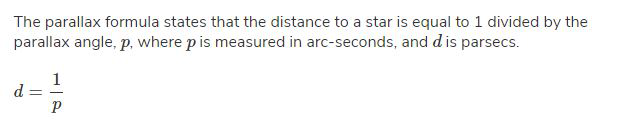

In [54]:
display(Image.open('../Star-Classification/Distance_by_Plx.JPG'))

In [55]:
df['DM'] = df.Plx.map(lambda x : 1/x)

#### 1 parsecs = 3.26 light lyears

In [56]:
df['ly'] = df['DM'].map(lambda x : (abs(x)*3.26))

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762,1.247954,-1.440000,7.610000,8.400000,9.070000,13.610000
Plx,96707.0,0.007108,0.011147,-0.035100,0.002520,0.004600,0.008270,0.772330
e_Plx,96707.0,1.264152,1.156387,0.380000,0.870000,1.080000,1.360000,69.070000
B_V,96707.0,0.700663,0.490001,-0.400000,0.342000,0.605000,1.072000,5.460000
DM,96707.0,286.335567,3292.193462,-100000.006360,109.890110,202.429156,361.010848,100000.006360
ly,96707.0,1952.241255,10594.701704,4.220994,393.244891,705.627752,1278.431449,326000.020735


#### Getting Amag (Absolute Magnitude)

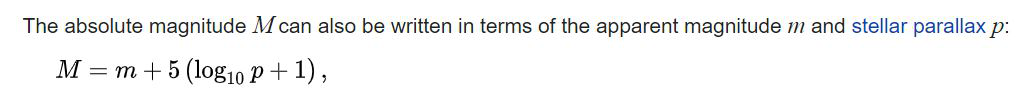

In [58]:
display(Image.open('../Star-Classification/Amag.JPG'))

In [59]:
df['Amag'] = df.Vmag + 5 *(np.log10(((df.Plx)))+1)

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762,1.247954,-1.440000,7.610000,8.400000,9.070000,13.610000
Plx,96707.0,0.007108,0.011147,-0.035100,0.002520,0.004600,0.008270,0.772330
e_Plx,96707.0,1.264152,1.156387,0.380000,0.870000,1.080000,1.360000,69.070000
B_V,96707.0,0.700663,0.490001,-0.400000,0.342000,0.605000,1.072000,5.460000
DM,96707.0,286.335567,3292.193462,-100000.006360,109.890110,202.429156,361.010848,100000.006360
ly,96707.0,1952.241255,10594.701704,4.220994,393.244891,705.627752,1278.431449,326000.020735
Amag,93556.0,1.599608,2.326055,-13.310000,0.263157,1.511542,3.064660,15.449015


### Getting Temperature Effective from B-V



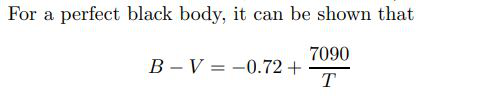

In [61]:
display(Image.open('../Star-Classification/temperature.JPG'))


In [62]:
df['Temperature'] = 7090/(df.B_V + 0.72)


<AxesSubplot:xlabel='B_V', ylabel='Temperature'>

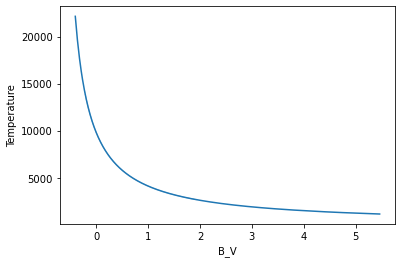

In [63]:
sns.lineplot(x=df.B_V, y = df.Temperature)


### Let's calculate luminosity


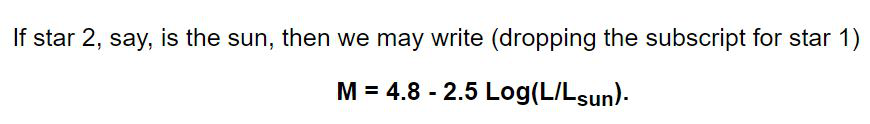

In [64]:
display(Image.open('../Star-Classification/Luminosity.JPG'))


In [65]:
df['Luminosity'] = df.Amag.map(lambda x: 3.828e+26/10**((x-4.8)/2.5))

In [66]:
df['Luminosity(Sun=1)'] = df.Amag.map(lambda x: 1/10**((x-4.8)/2.5))

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762e+00,1.247954e+00,-1.440000e+00,7.610000e+00,8.400000e+00,9.070000e+00,1.361000e+01
Plx,96707.0,7.107773e-03,1.114689e-02,-3.510000e-02,2.520000e-03,4.600000e-03,8.270000e-03,7.723300e-01
e_Plx,96707.0,1.264152e+00,1.156387e+00,3.800000e-01,8.700000e-01,1.080000e+00,1.360000e+00,6.907000e+01
B_V,96707.0,7.006627e-01,4.900010e-01,-4.000000e-01,3.420000e-01,6.050000e-01,1.072000e+00,5.460000e+00
DM,96707.0,2.863356e+02,3.292193e+03,-1.000000e+05,1.098901e+02,2.024292e+02,3.610108e+02,1.000000e+05
ly,96707.0,1.952241e+03,1.059470e+04,4.220994e+00,3.932449e+02,7.056278e+02,1.278431e+03,3.260000e+05
Amag,93556.0,1.599608e+00,2.326055e+00,-1.331000e+01,2.631575e-01,1.511542e+00,3.064660e+00,1.544901e+01
Temperature,96707.0,5.685351e+03,2.187985e+03,1.147249e+03,3.956473e+03,5.350943e+03,6.676083e+03,2.215625e+04
Luminosity,93556.0,8.568882e+29,3.791047e+31,2.105552e+22,1.892813e+27,7.913258e+27,2.498670e+28,6.713855e+33
Luminosity(Sun=1),93556.0,2.238475e+03,9.903467e+04,5.500398e-05,4.944654e+00,2.067204e+01,6.527352e+01,1.753881e+07


### Let's get Star Radius

Radius sun = 7.35355×10−8 light-year /2.25461×10−8	parsec
Tem sun = 5.778 K
Lum sun = 3.828×e+1026

In [68]:
df['Radius(sun)'] = df.Luminosity* 7.35355e-8*5.778/3.828e+26*df.Temperature

In [69]:
df['Radius'] = 1181.57*np.sqrt(df.Luminosity) / df.Temperature

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Vmag,96707.0,8.291762e+00,1.247954e+00,-1.440000e+00,7.610000e+00,8.400000e+00,9.070000e+00,1.361000e+01
Plx,96707.0,7.107773e-03,1.114689e-02,-3.510000e-02,2.520000e-03,4.600000e-03,8.270000e-03,7.723300e-01
e_Plx,96707.0,1.264152e+00,1.156387e+00,3.800000e-01,8.700000e-01,1.080000e+00,1.360000e+00,6.907000e+01
B_V,96707.0,7.006627e-01,4.900010e-01,-4.000000e-01,3.420000e-01,6.050000e-01,1.072000e+00,5.460000e+00
DM,96707.0,2.863356e+02,3.292193e+03,-1.000000e+05,1.098901e+02,2.024292e+02,3.610108e+02,1.000000e+05
ly,96707.0,1.952241e+03,1.059470e+04,4.220994e+00,3.932449e+02,7.056278e+02,1.278431e+03,3.260000e+05
Amag,93556.0,1.599608e+00,2.326055e+00,-1.331000e+01,2.631575e-01,1.511542e+00,3.064660e+00,1.544901e+01
Temperature,96707.0,5.685351e+03,2.187985e+03,1.147249e+03,3.956473e+03,5.350943e+03,6.676083e+03,2.215625e+04
Luminosity,93556.0,8.568882e+29,3.791047e+31,2.105552e+22,1.892813e+27,7.913258e+27,2.498670e+28,6.713855e+33
Luminosity(Sun=1),93556.0,2.238475e+03,9.903467e+04,5.500398e-05,4.944654e+00,2.067204e+01,6.527352e+01,1.753881e+07


### Display Star Classification

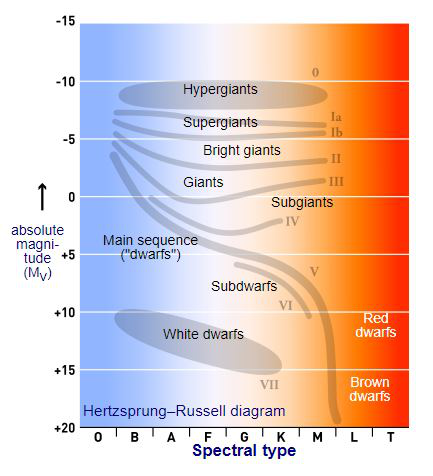

In [71]:
display(Image.open('../Star-Classification/Star_Classification.JPG'))

# - Create a label column via SpType

``` python
def label_amag(star_amag, star_type):
    dwarf_amag = np.arange(2.5, 20, 0.00001)
    giant_amag = np.arange(-20,2.5, 0.00001)
    dwarf_type = ['D','VI', 'VII', 'V']
    giant_type = ['IV', 'III', 'II', 'Ib', 'Ia', 'Ia-O']
    for i in dwarf_type :
        for a in dwarf_amag:
            if i in star_type and round(a,2) == round(star_amag,2):
                print(a)
                return 'Dwarf'
    for i in giant_type:
        for a in giant_amag:
            if i in star_type and round(a,2) == round(star_amag,2):
                return 'Giant'
    return 'Other'

```

In [72]:
def label_gen_stars(star):
    dwarf = ['D','VI', 'VII', 'V']
    giant = ['IV', 'III', 'II', 'Ib', 'Ia', 'Ia-O']
    for i in dwarf :
        if i in star:
            return 'Dwarf'
    for i in giant:
        if i in star:
            return 'Giant'
    return 'Other'
    

In [73]:
df['Star_Type'] = df.SpType.apply(label_gen_stars)

### Let's see the corr between the columns

<AxesSubplot:>

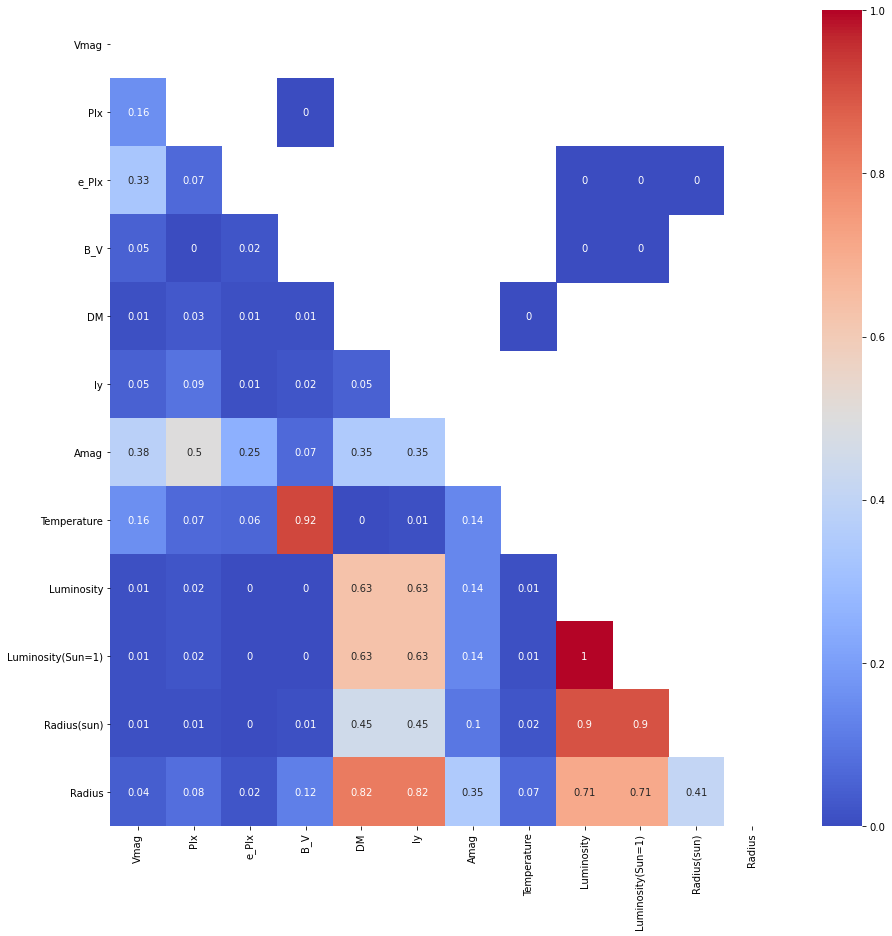

In [77]:
corr_matrix = df.corr().abs().round(2)
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask= np.triu(corr_matrix), cmap= 'coolwarm', annot=True)

#### We want to predict dwarf and giants stars ( we can desconsider other type)


In [78]:
df.Star_Type.value_counts()

Dwarf    27752
Giant    19759
Name: Star_Type, dtype: int64

In [79]:

df = df.query('Star_Type != "Other"')

df.query('Star_Type == "Other"')

df.Star_Type.value_counts()

Dwarf    27752
Giant    19759
Name: Star_Type, dtype: int64

### Dropping rows that are null

In [80]:
df.isnull().sum()

Vmag                    0
Plx                     0
e_Plx                   0
B_V                     0
SpType                  0
DM                      0
ly                      0
Amag                 1256
Temperature             0
Luminosity           1256
Luminosity(Sun=1)    1256
Radius(sun)          1256
Radius               1256
Star_Type               0
dtype: int64

In [87]:
df_clean = df.dropna()

In [88]:
print(f'We dropped : {df.shape[0] - df.dropna().shape[0]} rows')


We dropped : 1256 rows


In [91]:
df_clean.isnull().sum()

Vmag                 0
Plx                  0
e_Plx                0
B_V                  0
SpType               0
DM                   0
ly                   0
Amag                 0
Temperature          0
Luminosity           0
Luminosity(Sun=1)    0
Radius(sun)          0
Radius               0
Star_Type            0
dtype: int64

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46255 entries, 0 to 46254
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vmag               46255 non-null  float32
 1   Plx                46255 non-null  float64
 2   e_Plx              46255 non-null  float32
 3   B_V                46255 non-null  float32
 4   SpType             46255 non-null  object 
 5   DM                 46255 non-null  float64
 6   ly                 46255 non-null  float64
 7   Amag               46255 non-null  float64
 8   Temperature        46255 non-null  float64
 9   Luminosity         46255 non-null  float64
 10  Luminosity(Sun=1)  46255 non-null  float64
 11  Radius(sun)        46255 non-null  float64
 12  Radius             46255 non-null  float64
 13  Star_Type          46255 non-null  object 
dtypes: float32(3), float64(9), object(2)
memory usage: 4.4+ MB


#### Let's reindex

In [93]:
df_clean.reset_index(drop=True, inplace=True)


In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46255 entries, 0 to 46254
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vmag               46255 non-null  float32
 1   Plx                46255 non-null  float64
 2   e_Plx              46255 non-null  float32
 3   B_V                46255 non-null  float32
 4   SpType             46255 non-null  object 
 5   DM                 46255 non-null  float64
 6   ly                 46255 non-null  float64
 7   Amag               46255 non-null  float64
 8   Temperature        46255 non-null  float64
 9   Luminosity         46255 non-null  float64
 10  Luminosity(Sun=1)  46255 non-null  float64
 11  Radius(sun)        46255 non-null  float64
 12  Radius             46255 non-null  float64
 13  Star_Type          46255 non-null  object 
dtypes: float32(3), float64(9), object(2)
memory usage: 4.4+ MB


### Let's find the spectral color type

O Be A Fine Girl (or Guy), Kiss Me!

In [117]:
df_clean.loc[df_clean.B_V <= -0.33, 'Color_Type'] ='O'
df_clean.loc[(df_clean.B_V > -0.33 ) & (df_clean.B_V < -0.02) , 'Color_Type'] ='B'
df_clean.loc[(df_clean.B_V >= -0.02) & (df_clean.B_V < 0.3) , 'Color_Type'] ='A'
df_clean.loc[(df_clean.B_V >= 0.3) & (df_clean.B_V < 0.58) , 'Color_Type'] ='F'
df_clean.loc[(df_clean.B_V >= 0.58) & (df_clean.B_V < 0.81) , 'Color_Type'] ='G'
df_clean.loc[(df_clean.B_V >= 0.81) & (df_clean.B_V < 1.4 ) , 'Color_Type'] ='K'
df_clean.loc[df_clean.B_V >= 1.4,  'Color_Type'] ='M'

C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\bruna\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

# Vizualisation

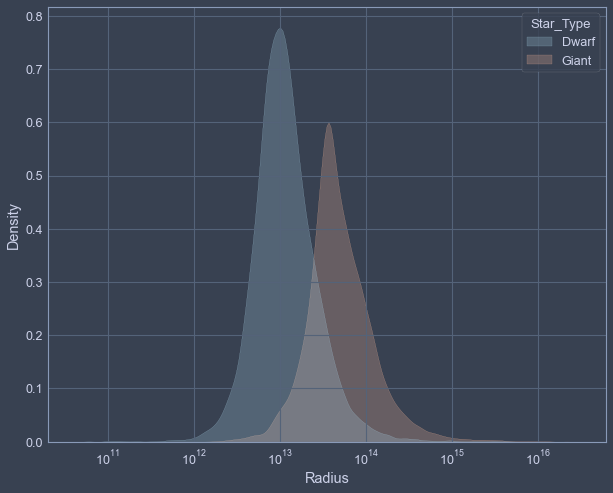

In [107]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df_clean, x = 'Radius', hue = 'Star_Type', palette = "RdBu_r", shade = True, log_scale=10)
plt.grid('-.')
jtplot.style(theme='monokai')
plt.show()


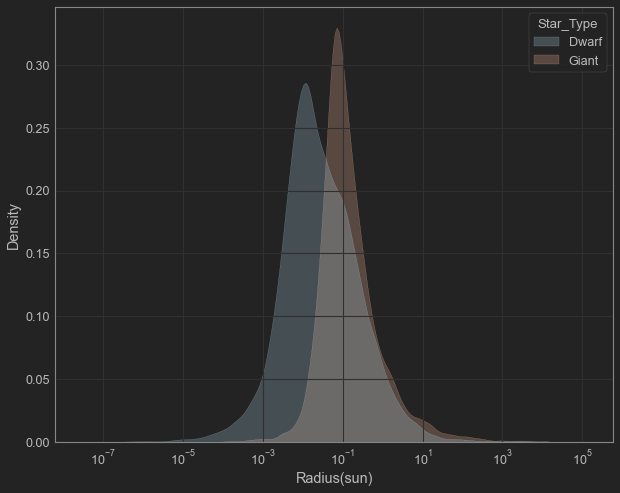

In [108]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df_clean, x = 'Radius(sun)', hue = 'Star_Type', palette = "RdBu_r", shade = True, log_scale=10)
plt.grid('-.')
jtplot.style(theme='monokai')
plt.show()


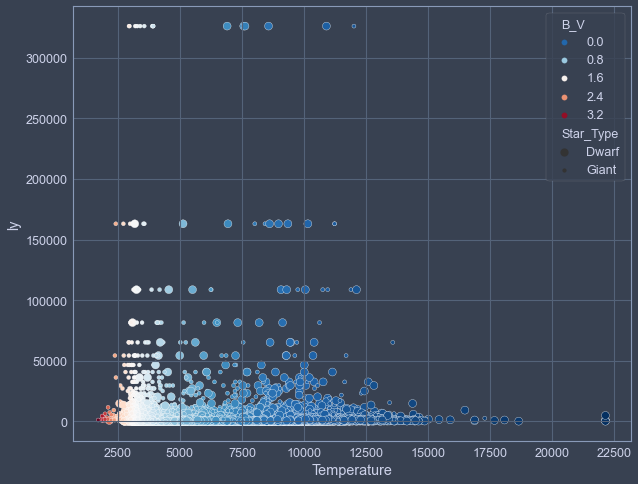

In [134]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, x = 'Temperature', y = 'ly', hue = 'B_V', size = 'Star_Type', x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='monokai')
plt.show()



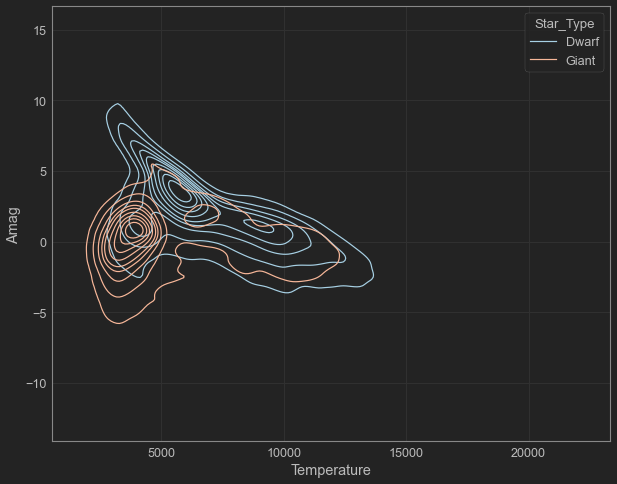

In [110]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df_clean, x = 'Temperature', y = 'Amag', hue = 'Star_Type', palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='oceans16')
plt.show()


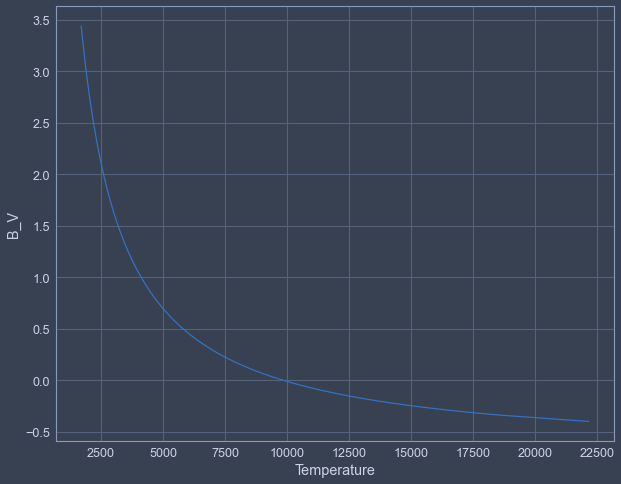

In [118]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df_clean, x = 'Temperature', y = 'B_V', palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='oceans16')
plt.show()


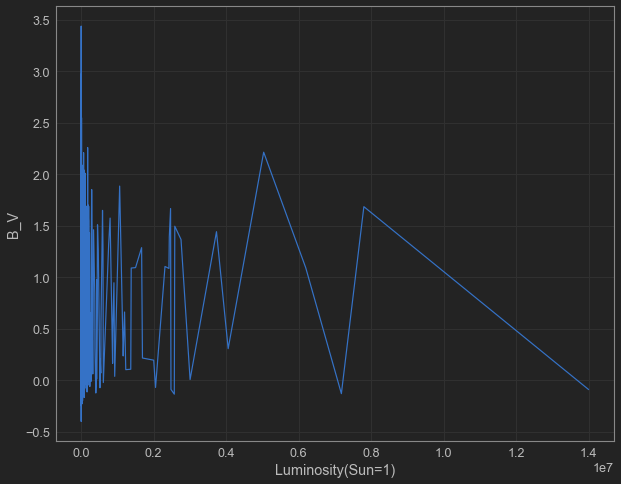

In [133]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df_clean, x = 'Luminosity(Sun=1)', y = 'B_V', palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='oceans16')
plt.show()


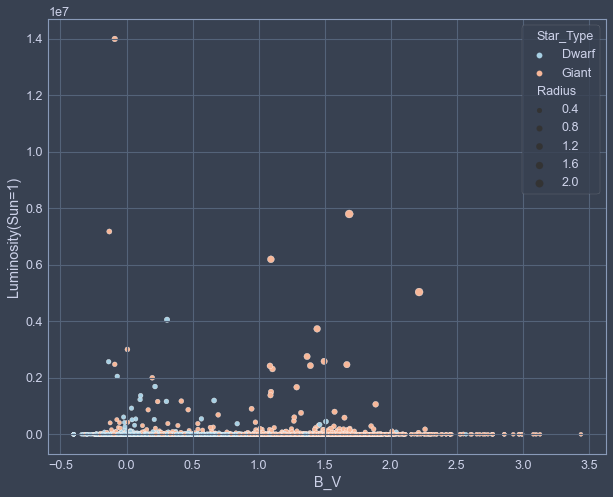

In [140]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, x = 'B_V', y = 'Luminosity(Sun=1)', size = 'Radius', hue = 'Star_Type', x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='monokai')
plt.show()


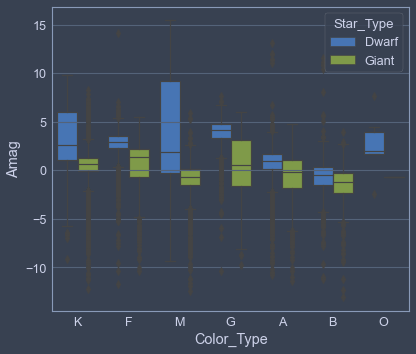

In [119]:
sns.boxplot(data = df_clean, x = 'Color_Type', y = 'Amag', hue = 'Star_Type')
jtplot.style(theme='solarizedd', gridlines= '-.', figsize=(10,10))
plt.show()

In [120]:
bright_order ='O','B','A','F','G','K','M'

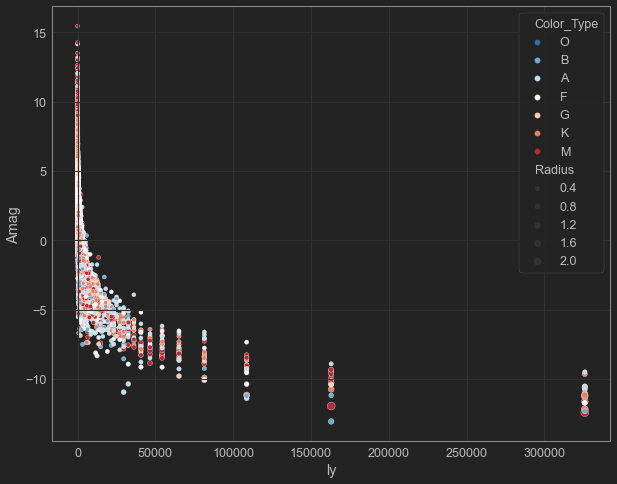

In [136]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, x = 'ly', y = 'Amag', hue = 'Color_Type', size ='Radius',
                hue_order= bright_order ,x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='monokai')
plt.show()

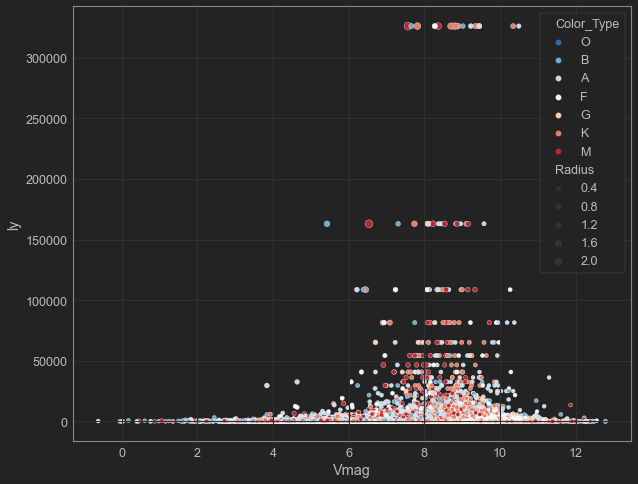

In [126]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, y = 'ly', x = 'Vmag', hue = 'Color_Type', size ='Radius',
                hue_order= bright_order ,x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='monokai')

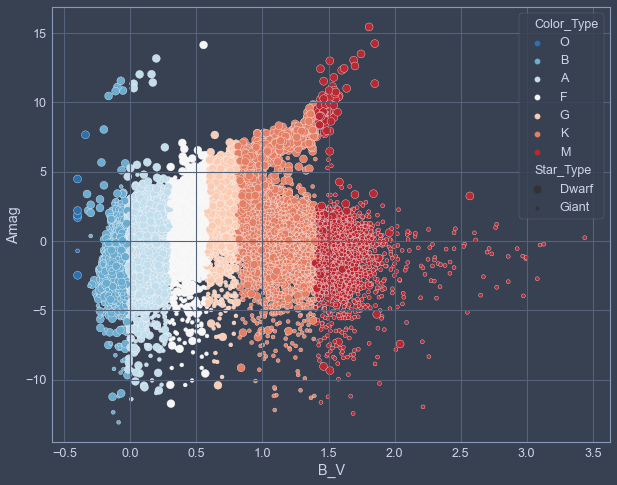

In [139]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, x = 'B_V', y = 'Amag', hue = 'Color_Type', size ='Star_Type',
                hue_order= bright_order ,x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='oceans16')
plt.show()

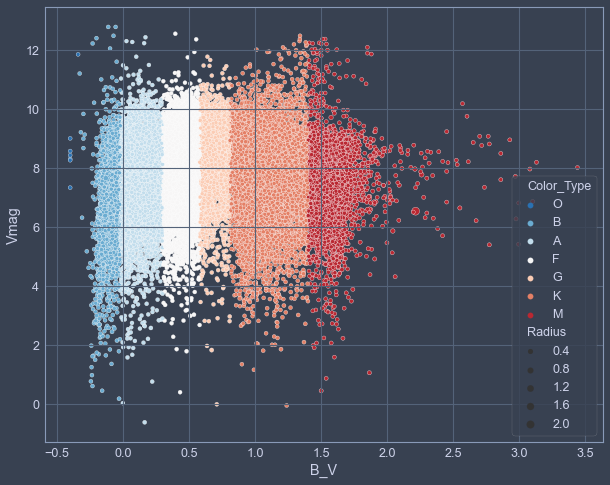

In [138]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_clean, x = 'B_V', y = 'Vmag', hue = 'Color_Type', size ='Radius',
                hue_order= bright_order ,x_bins=3, palette = "RdBu_r")
plt.grid('-.')
jtplot.style(theme='oceans16')
plt.show()

In [135]:
df.head()

,Vmag,Plx,e_Plx,B_V,SpType,DM,ly,Amag,Temperature,Luminosity,Luminosity(Sun=1),Radius(sun),Radius,Star_Type,Color_Type
1,9.27,0.02190,3.10,0.999,K3V,45.662103,148.858456,5.972221,4124.490952,1.300420e+26,0.339713,0.000595,3.266863e+12,Dwarf,K
3,8.06,0.00775,0.97,0.370,F0V,129.032263,420.645179,2.506509,6504.587128,3.164961e+27,8.267924,0.022850,1.021937e+13,Dwarf,F
4,8.55,0.00287,1.11,0.902,G8III,348.432084,1135.888594,0.839409,4371.146705,1.469630e+28,38.391599,0.071303,3.276937e+13,Giant,K
5,12.31,0.01880,4.99,1.336,M0V:,53.191494,173.404270,8.680789,3448.443637,1.073139e+25,0.028034,0.000041,1.122443e+12,Dwarf,K
9,8.59,0.01076,1.10,0.489,F6V,92.936805,302.973984,3.749061,5864.350739,1.007737e+27,2.632543,0.006559,6.396070e+12,Dwarf,F


## Get dummies

In [ ]:
sns.countplot(df.Star_Type)

#### Let's create a boolean column for our star type 

In [ ]:
stars['Type'] = np.where(stars.Star_Type == 'Giant', 0,1)

In [ ]:
stars.Type.value_counts()

Giants = 0

Dwarf = 1

#### Balancing the data

In [ ]:
# Separate the labels

df_giants = stars.query('Type == 0')
df_dwarfs = stars.query('Type == 1')

In [ ]:
# Numbers of rows of Giants and Dwarfs

num_of_giant = df_giants.shape[0]
num_of_dwarf = df_dwarfs.shape[0]
print("Giants(0):",num_of_giant)
print("Dwarfs(1):",num_of_dwarf)

In [ ]:
from sklearn.utils import resample


In [ ]:
# Downsample majority class
df_dwarfs_balanced = resample(df_dwarfs, 
                                 replace=False,    # sample without replacement
                                 n_samples=num_of_giant,     # to match minority class
                                 random_state=1) # reproducible results
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_dwarfs_balanced, df_giants])

In [ ]:
df_balanced.Type.value_counts()

#### The SpType columns has too many uniques values and is too big for get dummies

So lets drop it for the moment

In [ ]:
df_balanced.info()

#### Dropping object columns 

In [ ]:
df_1 = df_balanced.drop(['SpType', 'Star_Type','Color', 'Approx_Surface_Temperature(K)', 'Main_Charac',
                  'Avg_Mass','Avg_Radius','Avg_Light','B_V_index'], axis = 1).copy()

In [ ]:
df_1.info()

#### Converting object type

In [ ]:
df_dummy = pd.get_dummies(data = df_1, columns = ['Color_Type'])

In [ ]:
df_dummy.info()

In [ ]:
df_dummy.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Splitting my test and train 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_dummy.drop('Type', axis = 1),
                                                   df_dummy.Type, test_size = 1/5,
                                                   random_state = 42,
                                                   stratify = df_dummy.Type)

In [ ]:
df

In [ ]:
df_dummy

#### Logistic Regression

In [ ]:
model_logistic = LogisticRegression(max_iter = 1e5)

In [ ]:
model_logistic.fit(x_train, y_train)


In [ ]:
y_pred1 = model_logistic.predict(x_test)

In [ ]:
print("The Confusion Matrix is :")
display(confusion_matrix(y_test,y_pred1))

In [ ]:
print('Accuracy score is :', accuracy_score(y_test, y_pred1).round(2)*100)

In [ ]:
print('Precision score is :', precision_score(y_test, y_pred1).round(2)*100)

In [ ]:
print('Recall score is :', recall_score(y_test, y_pred1).round(2)*100)

In [ ]:
print('F1 score is :', f1_score(y_test, y_pred1).round(2)*100)

#### Decision Tree

In [ ]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred2 = model_tree.predict(x_test)

In [ ]:
print("The Confusion Matrix is :")
display(confusion_matrix(y_test,y_pred1))
print('Accuracy score is :', accuracy_score(y_test, y_pred2).round(2)*100)
print('Precision score is :', precision_score(y_test, y_pred2).round(2)*100)
print('Recall score is :', recall_score(y_test, y_pred2).round(2)*100)
print('F1 score is :', f1_score(y_test, y_pred2).round(2)*100)

In [ ]:
model_knn = KNeighborsClassifier(5, weights = 'distance')
model_knn.fit(x_train, y_train)
y_pred3 = model_knn.predict(x_test)
display(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(recall_score(y_test, y_pred3))
print(f1_score(y_test, y_pred3))